In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf


In [3]:
size = 256
img_data = tf.keras.preprocessing.image.load_img('Bill_Gates.jpg', target_size= (size, size))
img_data_arr = tf.keras.preprocessing.image.img_to_array(img_data)

img_array = img_data_arr.astype('float32') / 255.

# expand dim
np_img = np.expand_dims(img_array, axis= 0)
np_img.shape

(1, 256, 256, 3)

In [10]:

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(size, size, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2), padding='same'))
model.add(tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2), padding='same'))
model.add(tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2), padding='same')) #Latent Space
#Dense Layer
#=========================================Dont Get Confused
#Dense Layer
model.add(tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.UpSampling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.UpSampling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.UpSampling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')) #Regenerated Image



In [13]:
# model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.compile(optimizer='adam', loss='mae', metrics=['mae'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 128, 128, 8)    │         2,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 64, 64, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 64, 64, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 32, 32, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 64, 64, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 64, 64, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_4 (UpSampling2D)  │ (None, 128, 128, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 128, 128, 32)   │         2,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_5 (UpSampling2D)  │ (None, 256, 256, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 256, 256, 3)    │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,163 (31.89 KB)

 Trainable params: 8,163 (31.89 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# eager running of functions:
tf.config.experimental_run_functions_eagerly(True)

In [15]:
model.fit(np_img, np_img, epochs=5000, shuffle=True)

Epoch 1/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - loss: 0.3235 - mae: 0.3235
Epoch 2/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - loss: 0.3219 - mae: 0.3219
Epoch 3/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - loss: 0.3212 - mae: 0.3212
Epoch 4/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - loss: 0.3208 - mae: 0.3208
Epoch 5/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - loss: 0.3203 - mae: 0.3203
Epoch 6/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - loss: 0.3198 - mae: 0.3198
Epoch 7/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - loss: 0.3192 - mae: 0.3192
Epoch 8/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - loss: 0.3182 - mae: 0.3182
Epoch 9/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - loss: 0.3166 - mae: 0.3166
Epoch 10/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step - loss: 0.3136 - mae: 0.3136
Epoch 11/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step - loss: 0.3092 - mae: 0.3092
Epoch 12/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step - loss: 0.3034 - mae: 0.3034
Epoch 13/5000
1/1 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


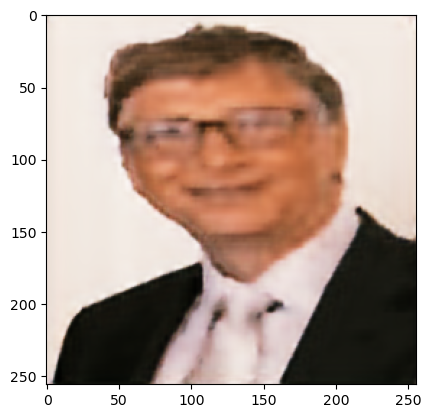

In [18]:
prediction = model.predict(np_img)

# Result:
import matplotlib.pyplot as plt

plt.imshow(prediction[0].reshape(size,size,3), cmap='gray')